Import

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import  StratifiedKFold
import matplotlib.pyplot as plt

get data

In [89]:
dataTomClancy  = pd.read_csv('./rs6_clean.csv')
dataTomClancy.shape

(5035, 11)

In [90]:
dataTomClancy.head(2)

,Unnamed: 0,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,0,imBrendyn,39693,27208,3963,2524,87180363,16789,336,6487,2105
1,1,bestboy021,52978,31853,6332,2716,111206504,18196,1204,9048,2440


propreter des data

In [91]:
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'melee_kills', 'games_played', 'time_played','wins']
GoodDataTomClancy = dataTomClancy[colonnes]
GoodDataTomClancy.head(3)

,kills,deaths,losess,xp,headshots,melee_kills,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,336,6487,2105,3963
1,52978,31853,2716,111206504,18196,1204,9048,2440,6332
2,32141,31353,2892,89109230,12652,564,7417,2184,4525


test data

In [92]:
max_values = GoodDataTomClancy.max()
print("Valeurs maximales pour chaque colonne :")
print(max_values)

Valeurs maximales pour chaque colonne :
kills               86396
deaths              82231
losess              17403
xp              235629835
headshots           34098
melee_kills          2393
games_played        22904
time_played          5686
wins                13678
dtype: int64


In [93]:
mediane_wins = GoodDataTomClancy['wins'].median()
print(f"\nMédiane de 'wins': {mediane_wins}")


Médiane de 'wins': 2286.0


In [94]:

au_dessus_mediane = dataTomClancy[dataTomClancy['wins'] > mediane_wins]
print(f"\nMédiane de 'wins' au_dessus_mediane")
au_dessus_mediane.shape



Médiane de 'wins' au_dessus_mediane


(2516, 11)

In [95]:
en_dessous_mediane = dataTomClancy[dataTomClancy['wins'] <= mediane_wins]
print(f"\nMédiane de 'wins' en_dessous_mediane")
en_dessous_mediane.shape


Médiane de 'wins' en_dessous_mediane


(2519, 11)

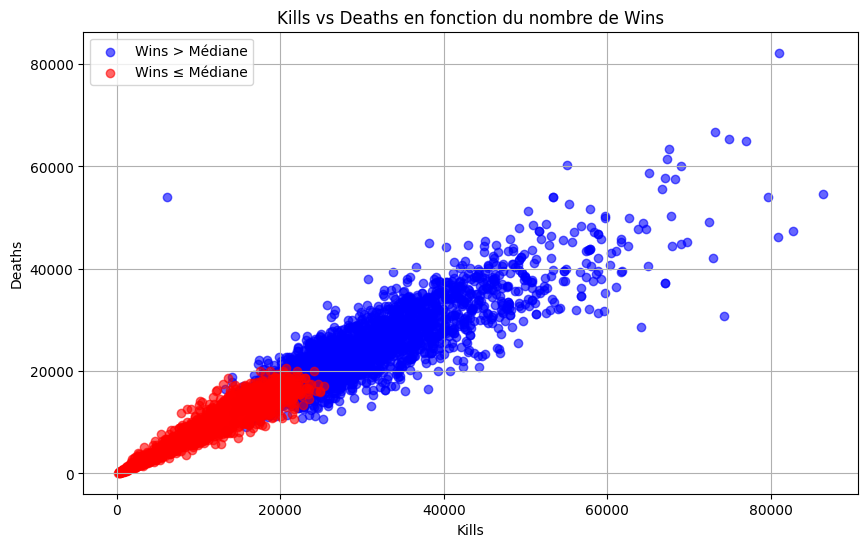

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataTomClancy' is your DataFrame and 'mediane_wins' is defined
colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(10, 6))

for key, condition in [
    (True, dataTomClancy['wins'] > mediane_wins),
    (False, dataTomClancy['wins'] <= mediane_wins)
]:
    subset = dataTomClancy[condition]
    ax.scatter(
        x=subset['kills'],
        y=subset['deaths'],
        label='Wins > Médiane' if key else 'Wins ≤ Médiane',
        color=colors[key],
        alpha=0.6
    )

plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('Kills vs Deaths en fonction du nombre de Wins')
plt.legend()
plt.grid(True)
plt.show()


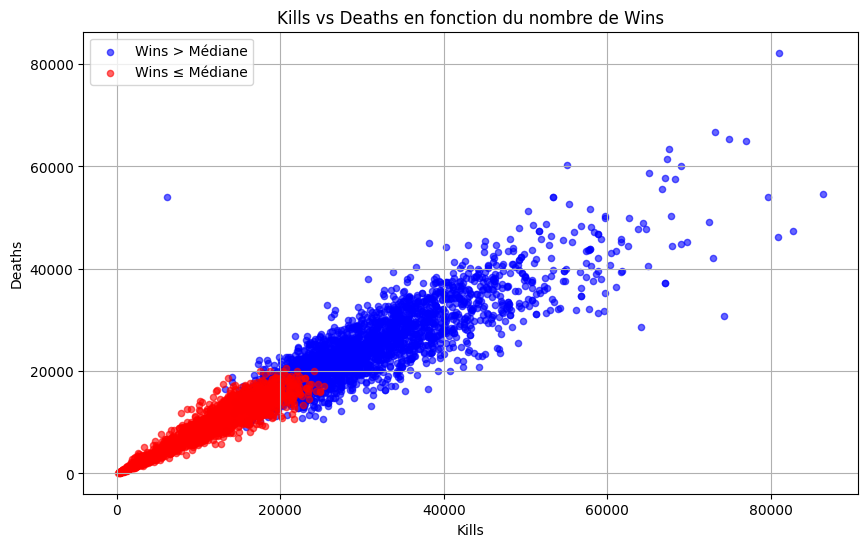

In [97]:
colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(10, 6))

for key, condition in [(True, dataTomClancy['wins'] > mediane_wins),
                       (False, dataTomClancy['wins'] <= mediane_wins)]:
    subset = dataTomClancy[condition] 
    subset.plot(
        ax=ax,
        kind='scatter',
        x='kills',
        y='deaths',
        label='Wins > Médiane' if key else 'Wins ≤ Médiane',
        color=colors[key],
        alpha=0.6
    )

plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('Kills vs Deaths en fonction du nombre de Wins')
plt.legend()
plt.grid(True)
plt.show()

Corrélation des autres variables avec 'wins':
wins            1.000000
games_played    0.980924
time_played     0.967955
xp              0.967797
kills           0.966041
headshots       0.942601
deaths          0.937343
losess          0.889367
melee_kills     0.733176
Name: wins, dtype: float64


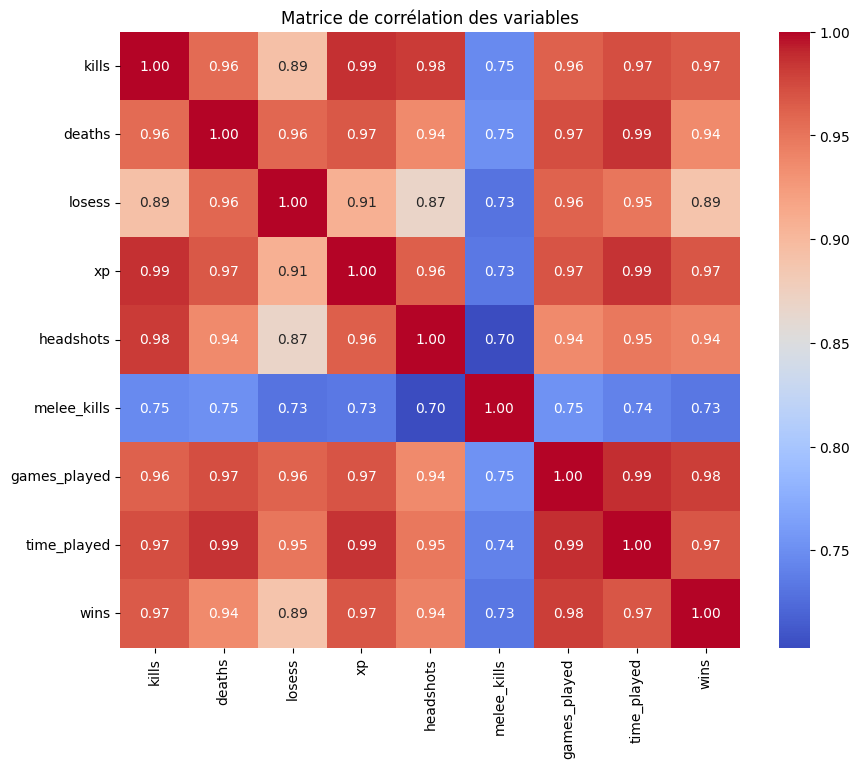

In [98]:
correlation_matrix = GoodDataTomClancy.corr()

correlation_with_wins = correlation_matrix['wins'].sort_values(ascending=False)
print("Corrélation des autres variables avec 'wins':")
print(correlation_with_wins)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables')
plt.show()

| Rang | Variable       | Corrélation avec `wins` | > 75% |
|------|----------------|-------------------------|-------|
| 1    | Kills         | 0.97                    | ✅    |
| 1    | XP            | 0.97                    | ✅    |
| 1    | Time Played   | 0.97                    | ✅    |
| 4    | Deaths        | 0.94                    | ✅    |
| 4    | Headshots     | 0.94                    | ✅    |
| 6    | Games Played  | 0.98                    | ✅    |
| 7    | Losess        | 0.89                    | ✅    |
| 8    | Melee Kills   | 0.73                    | ❌    |


1 Échantillon aléatoire : Nous prenons un échantillon aléatoire de 100 valeurs
2 Boucle pour chaque variable


In [99]:
variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played','wins']
GoodDataTomClancy =GoodDataTomClancy[variables]

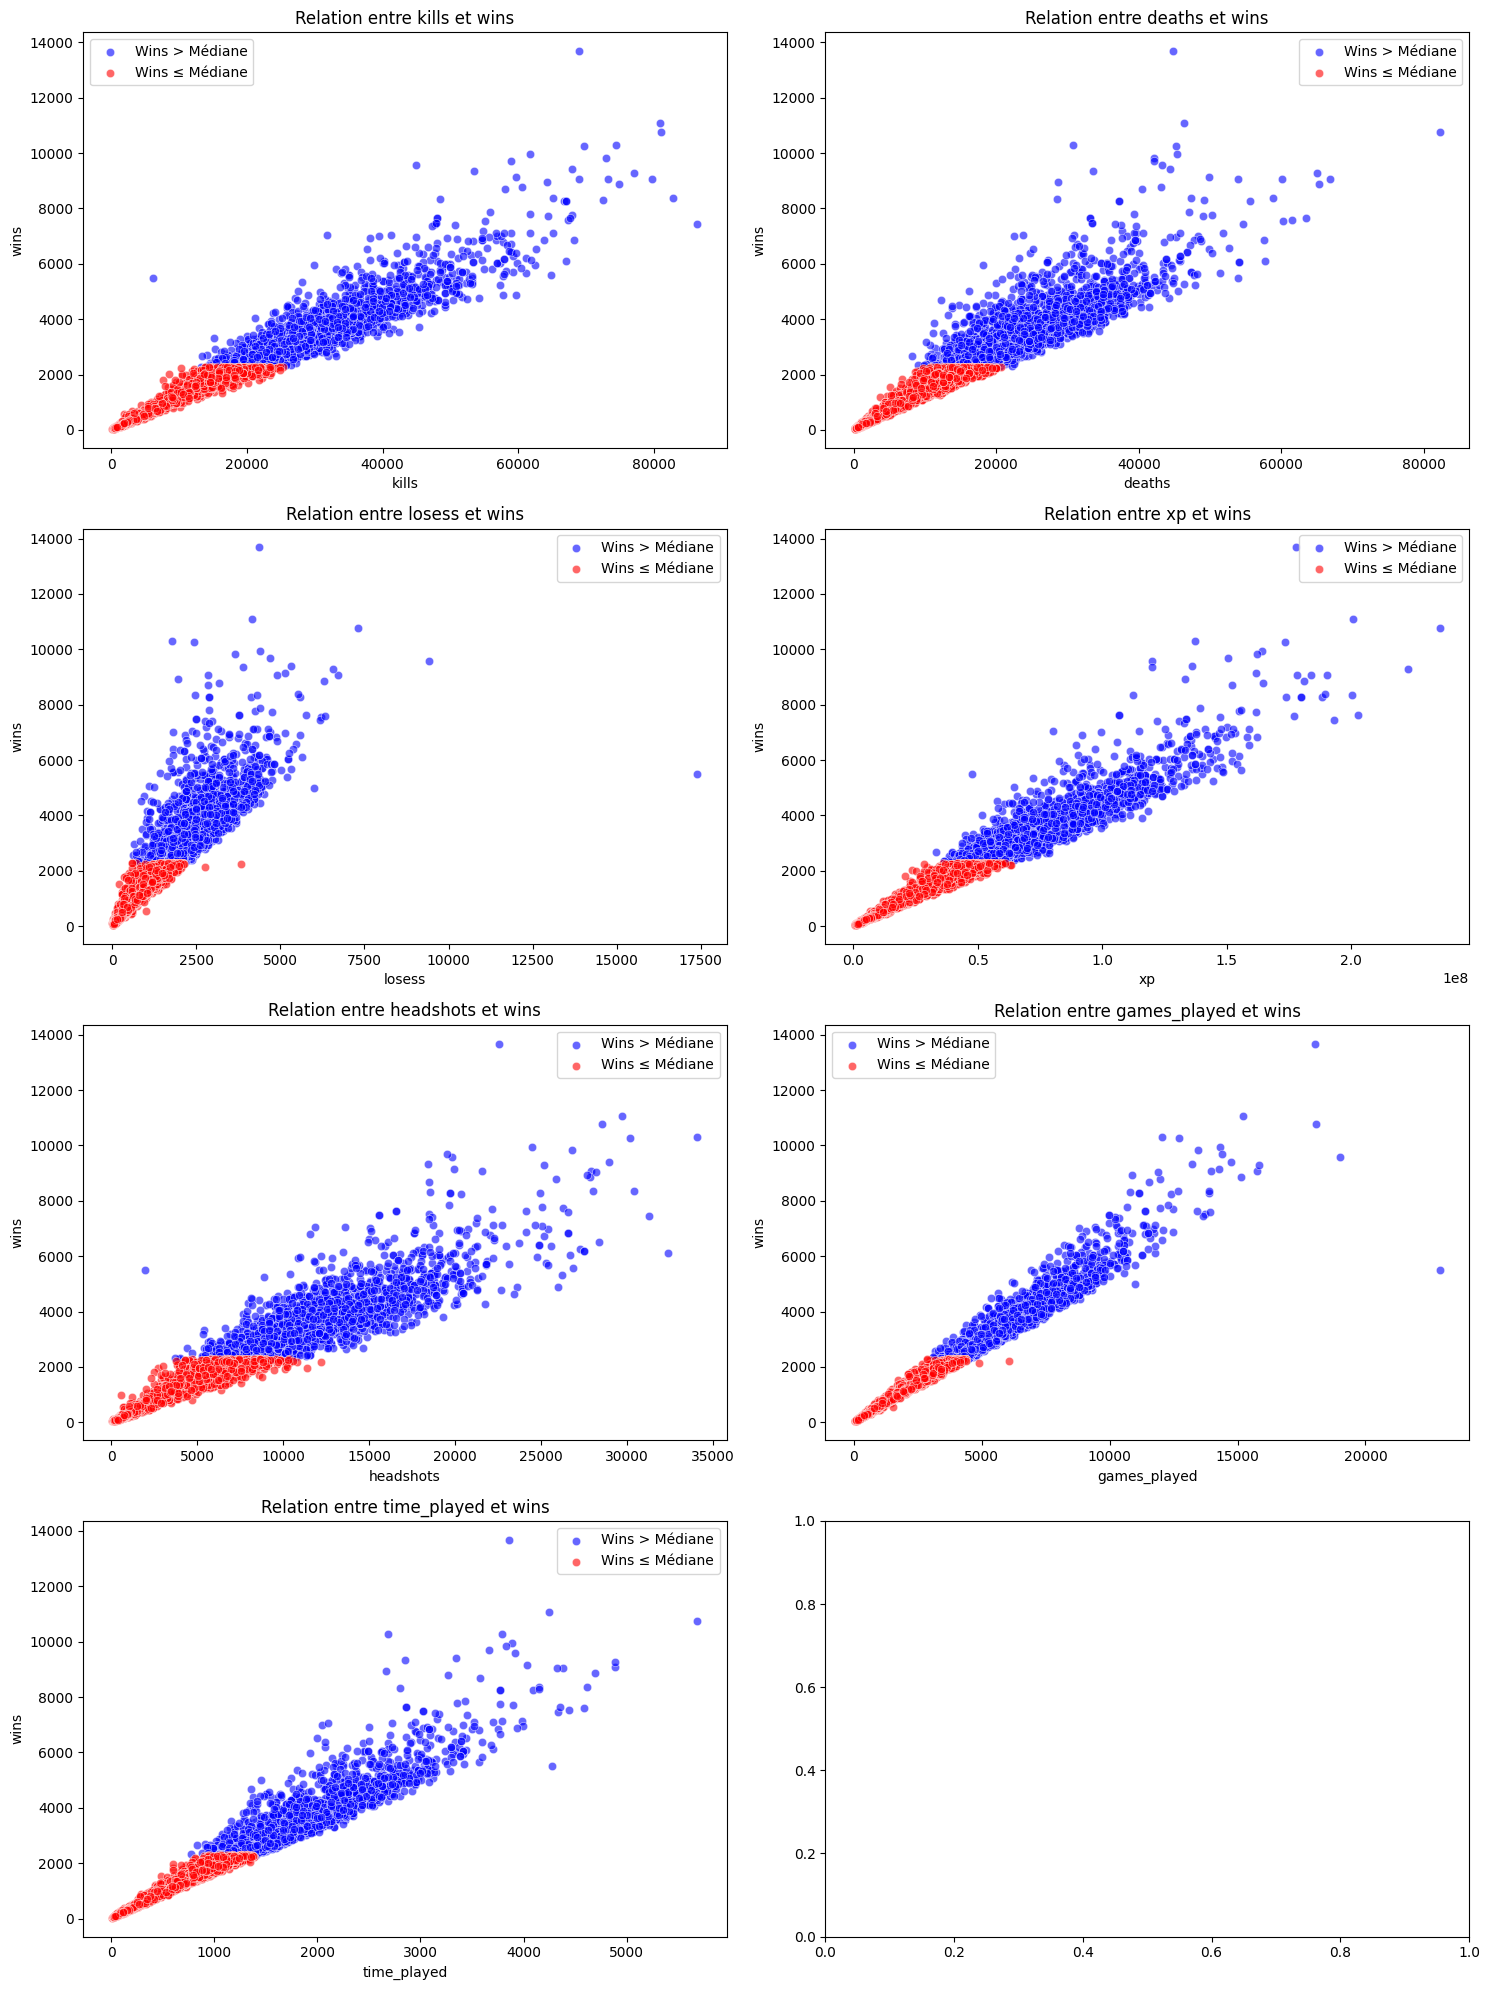

In [100]:

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    for key, condition in [(True, GoodDataTomClancy['wins'] > mediane_wins), 
                           (False, GoodDataTomClancy['wins'] <= mediane_wins)]:
        subset = GoodDataTomClancy[condition]
        color = 'blue' if key else 'red'
        label = 'Wins > Médiane' if key else 'Wins ≤ Médiane'
        sns.scatterplot(x=var, y='wins', data=subset, ax=axes[i], color=color, label=label, alpha=0.6)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [101]:
GoodDataTomClancy.head(3)

,kills,deaths,losess,xp,headshots,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,6487,2105,3963
1,52978,31853,2716,111206504,18196,9048,2440,6332
2,32141,31353,2892,89109230,12652,7417,2184,4525


c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, 

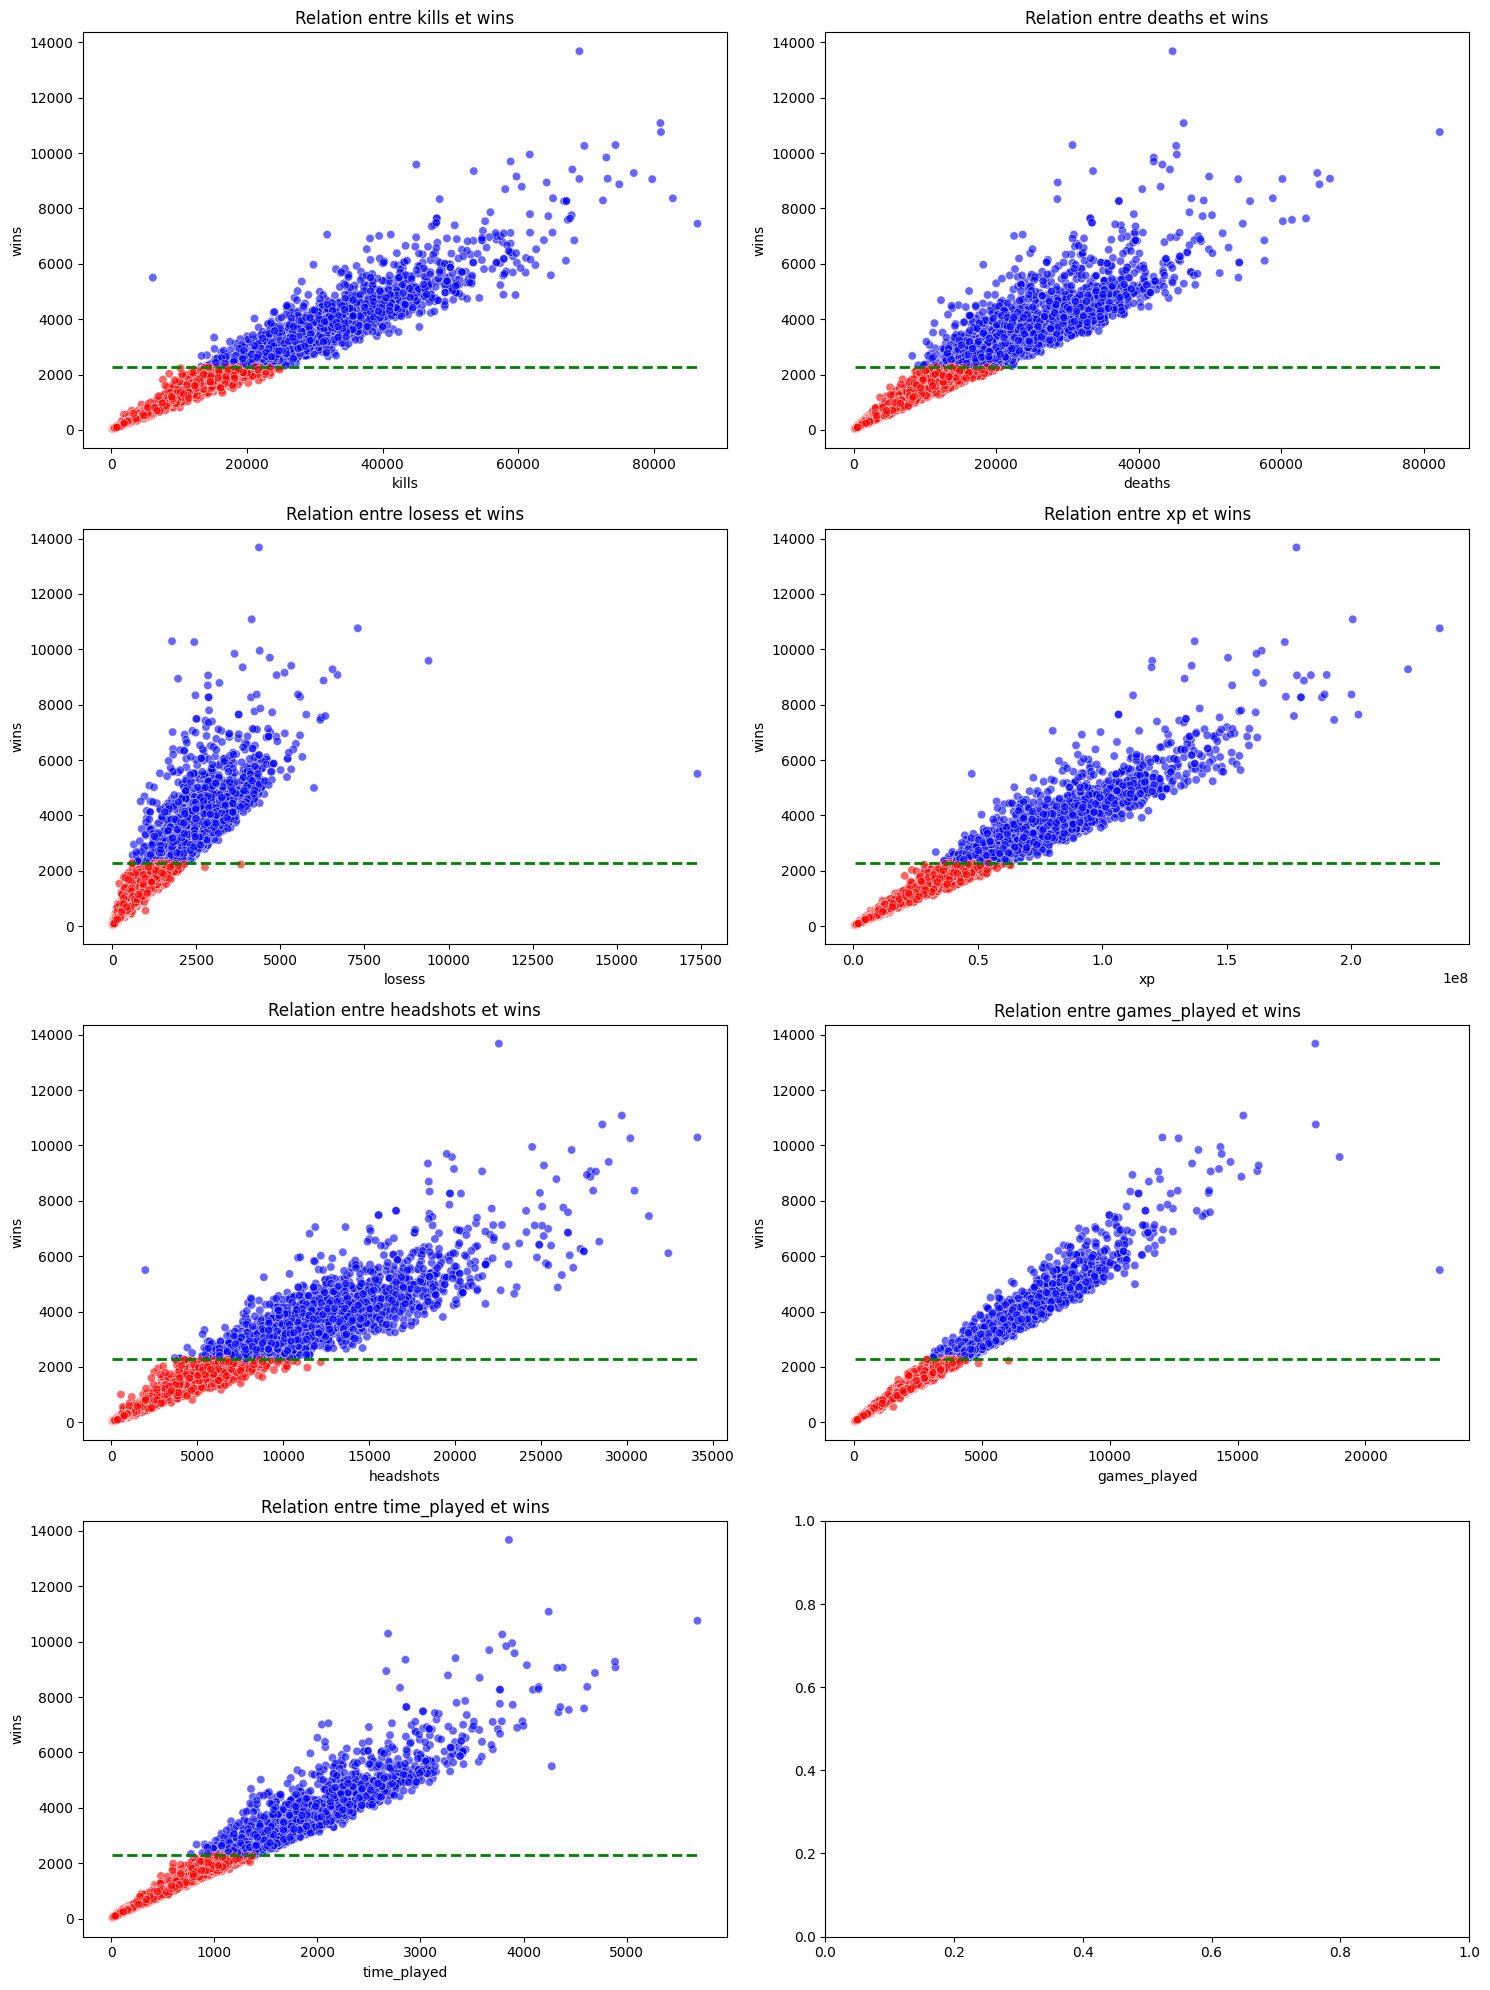

In [102]:



GoodDataTomClancy['median_wins'] = (GoodDataTomClancy['wins'] > mediane_wins).astype(int)

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(x=var, y='wins', hue='median_wins', data=GoodDataTomClancy, ax=axes[i],
                    palette={1: 'blue', 0: 'red'}, alpha=0.6, legend=False)
    
    X = GoodDataTomClancy[[var]]
    y = GoodDataTomClancy['median_wins']
    model = LogisticRegression().fit(X, y)
    
    x_range = np.linspace(X[var].min(), X[var].max(), 200).reshape(-1, 1)
    decision_boundary = model.predict_proba(x_range)[:, 1] >= 0.5
    y_boundary = np.full(x_range.shape, mediane_wins)
    
    axes[i].plot(x_range, y_boundary, color='green', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('wins')

plt.tight_layout()
plt.show()


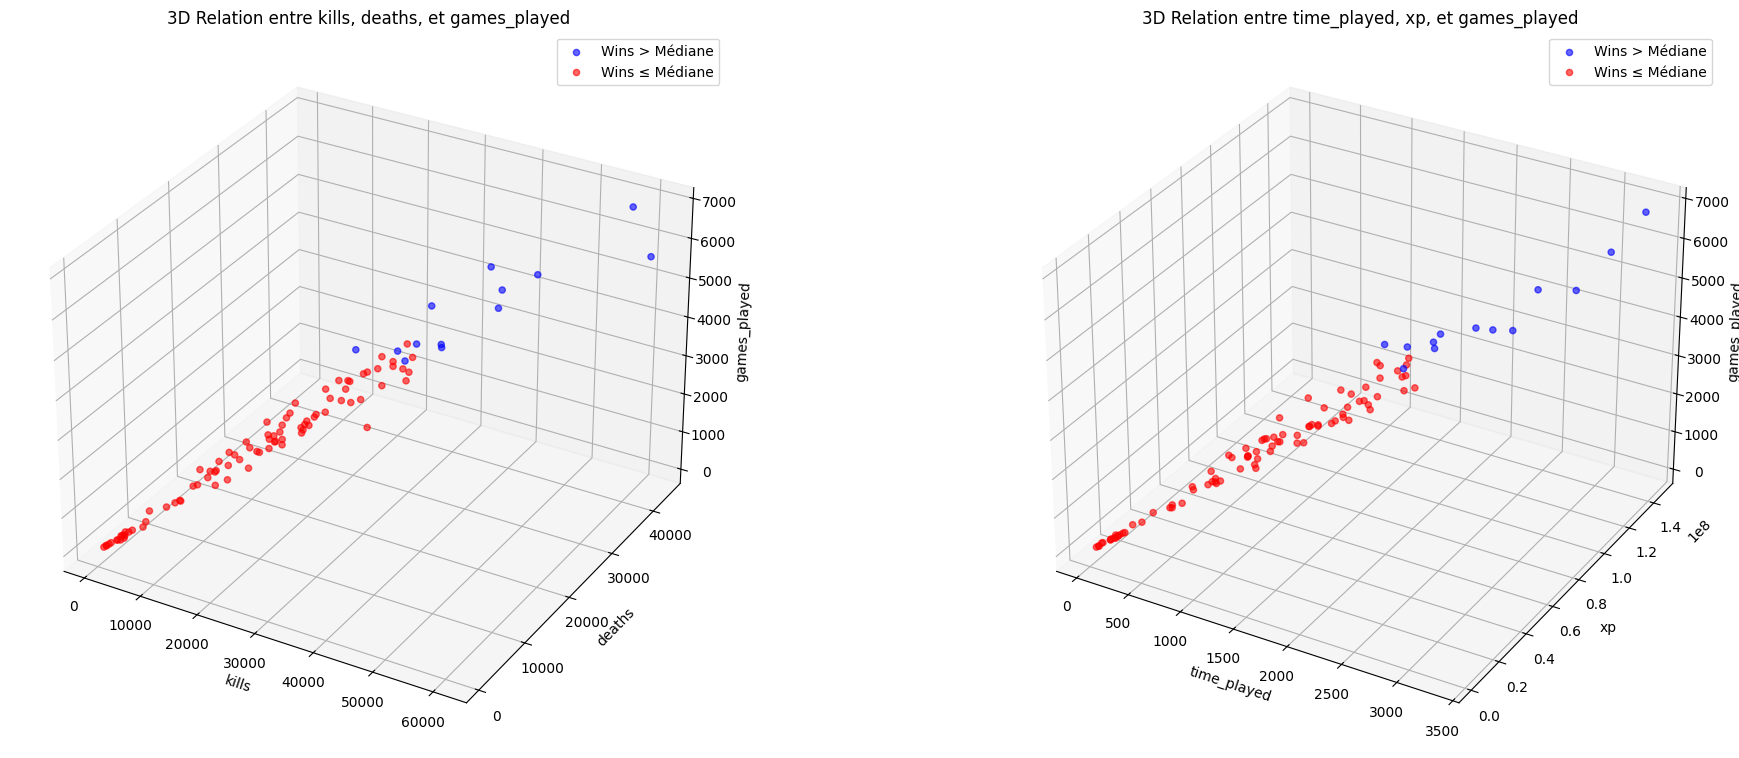

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_pairs = [('kills', 'deaths'), ('time_played', 'xp')]
median_wins = sample_data['games_played'].median()

fig = plt.figure(figsize=(20, 15))

for i, (x_var, y_var) in enumerate(important_pairs):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    subset_above = sample_data[sample_data['wins'] > median_wins]
    subset_below = sample_data[sample_data['wins'] <= median_wins]

    ax.scatter(subset_above[x_var], subset_above[y_var], subset_above['wins'], 
               color='blue', alpha=0.6, label='Wins > Médiane')

    ax.scatter(subset_below[x_var], subset_below[y_var], subset_below['wins'], 
               color='red', alpha=0.6, label='Wins ≤ Médiane')

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_zlabel('games_played')
    ax.set_title(f'3D Relation entre {x_var}, {y_var}, et games_played')
    ax.legend()

plt.tight_layout()
plt.show()


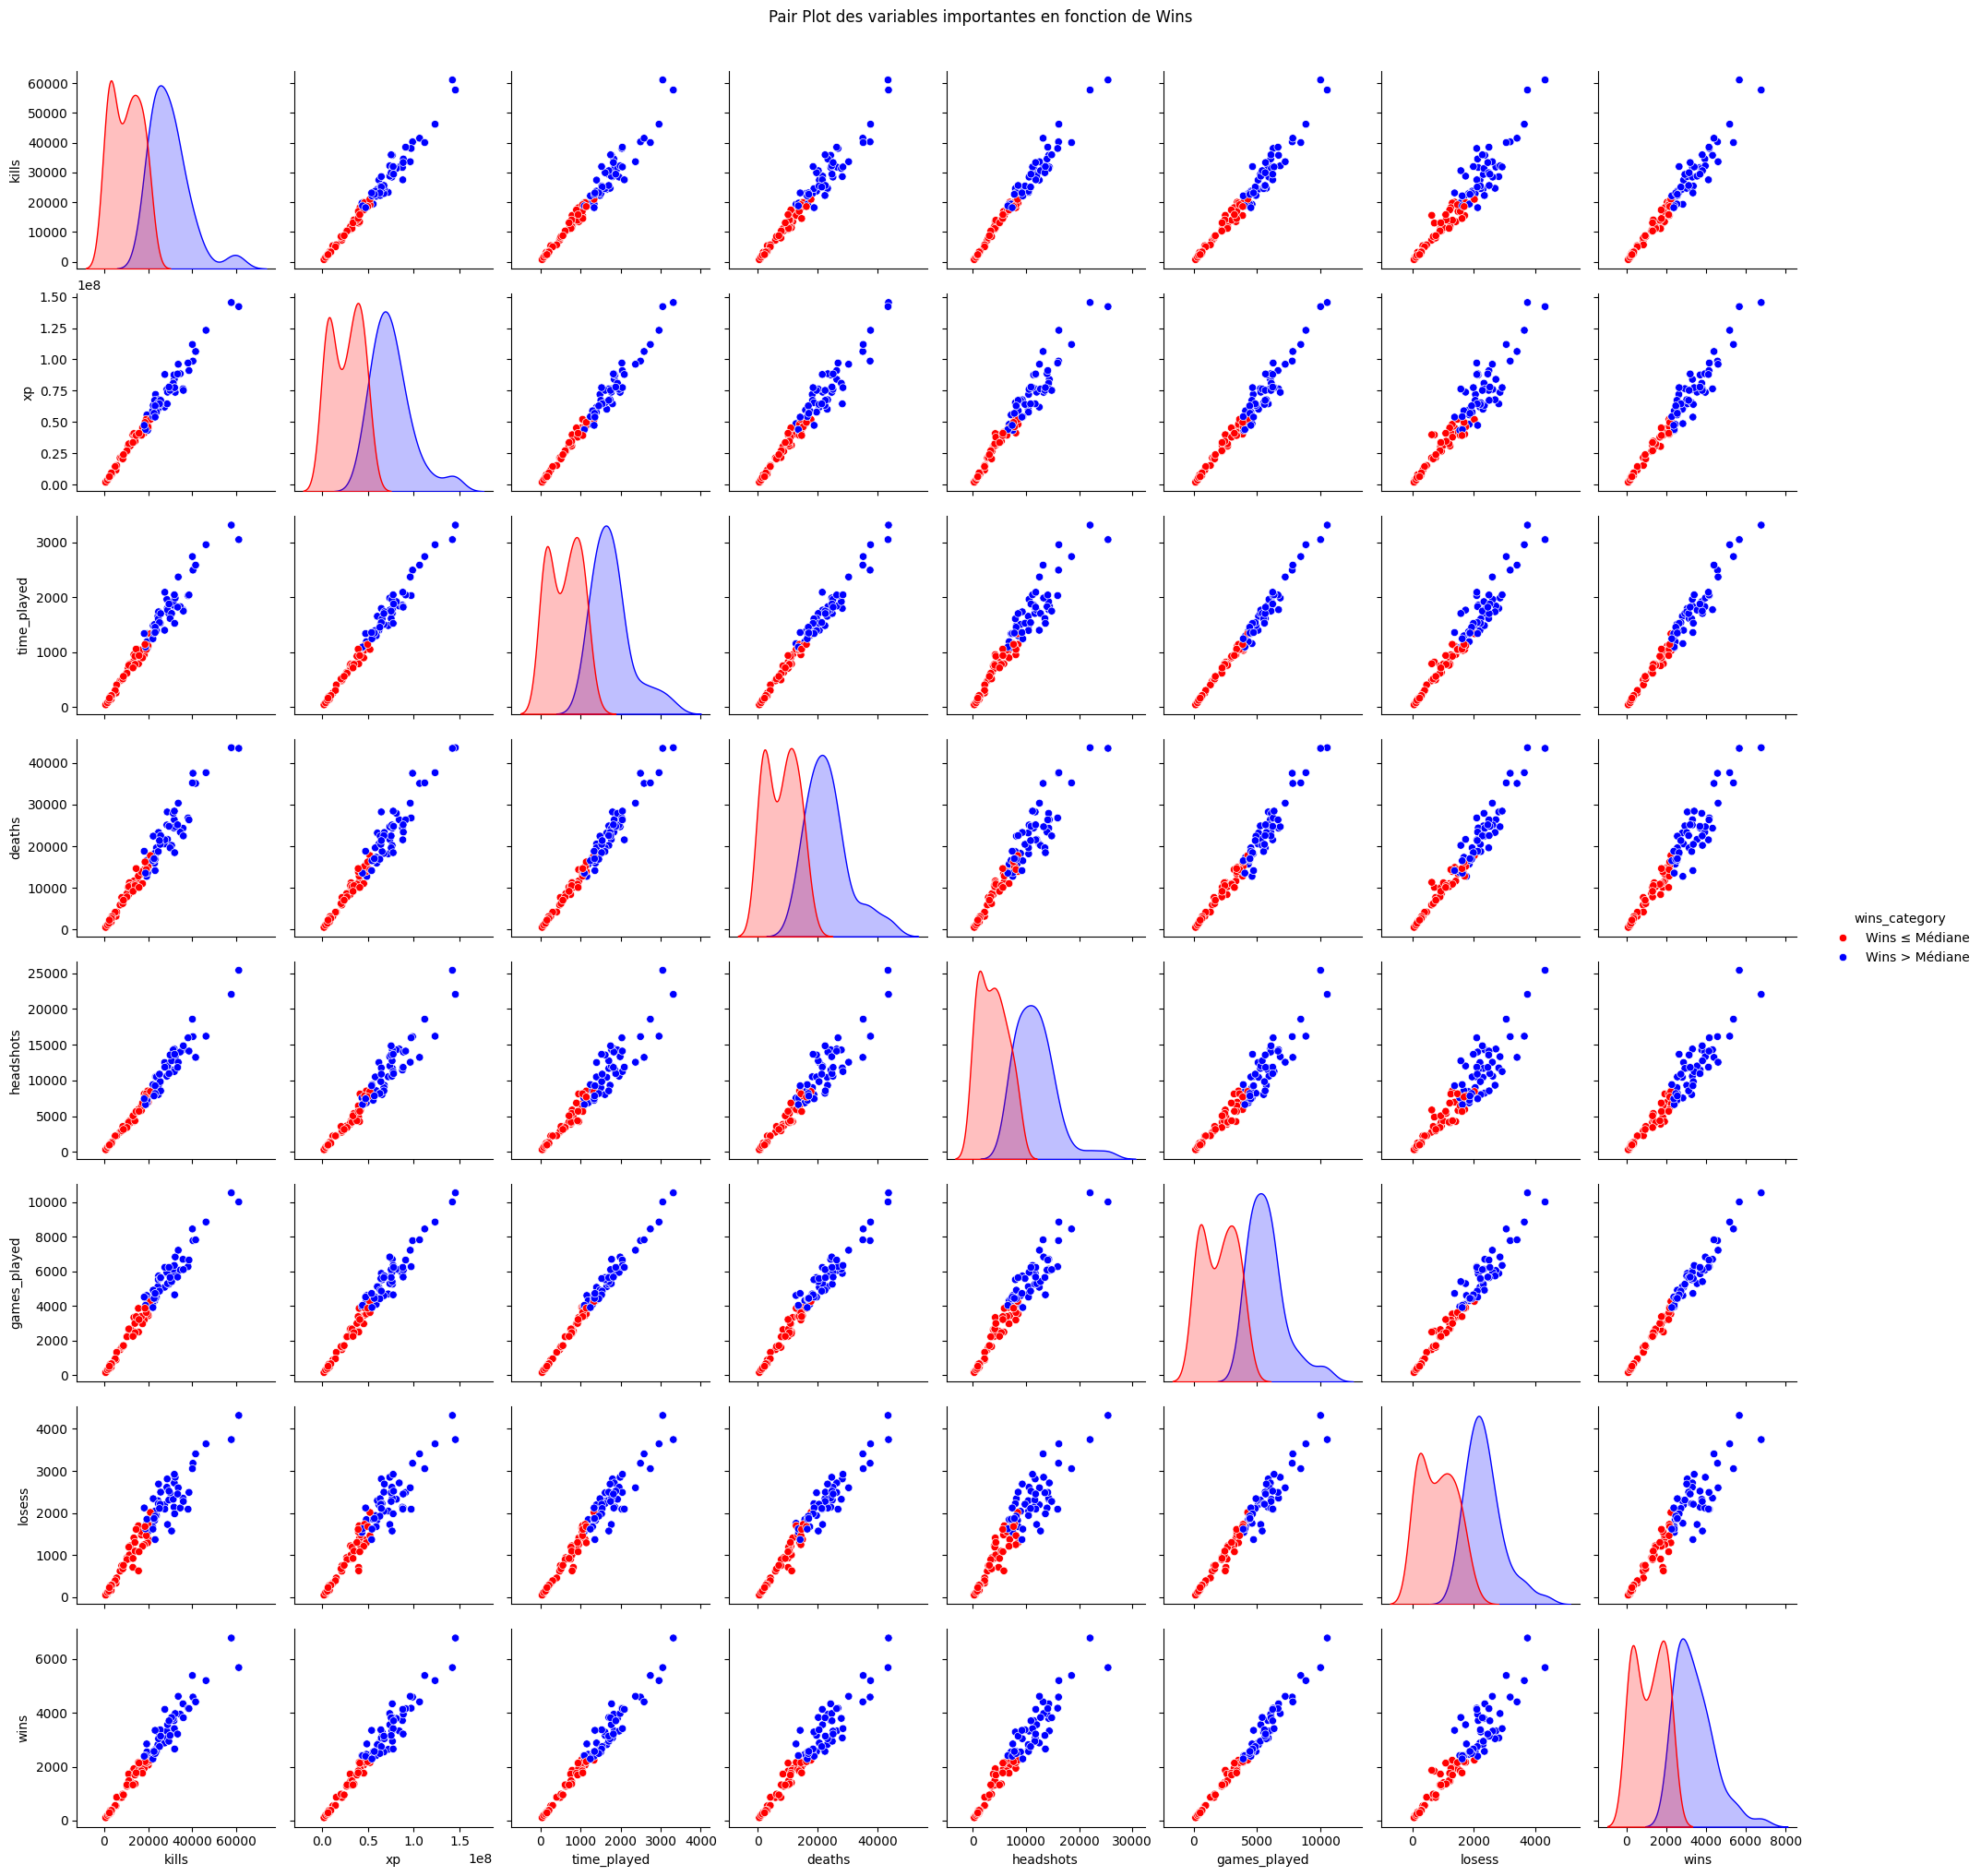

In [104]:


sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_vars = ['kills', 'xp', 'time_played', 'deaths', 'headshots', 'games_played', 'losess', 'wins']

sample_data['wins_category'] = np.where(sample_data['wins'] > sample_data['wins'].median(), 'Wins > Médiane', 'Wins ≤ Médiane')

sns.pairplot(sample_data[important_vars + ['wins_category']], hue='wins_category', palette={'Wins > Médiane': 'blue', 'Wins ≤ Médiane': 'red'})
plt.suptitle('Pair Plot des variables importantes en fonction de Wins', y=1.02)
plt.show()


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:



filtered_wins_category_1 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 1].head(4)
filtered_wins_category_0 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 0].head(4)

print("mediane_wins : ",mediane_wins)



mediane_wins :  2286.0


In [107]:
filtered_wins_category_1

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1
2,32141,31353,2892,89109230,12652,7417,2184,4525,1
3,44525,33800,3030,111741958,18692,7753,2481,4723,1


In [108]:
filtered_wins_category_0

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
10,4180,3088,184,10658571,1535,727,217,543,0
14,4281,2930,286,9024784,1806,724,235,438,0
15,7026,5503,412,18730457,2332,1310,393,898,0
18,16922,12395,713,42095357,6715,2977,943,2264,0


In [109]:
import numpy as np
random_state_value = np.random.randint(0, 101)
test_final = GoodDataTomClancy.sample(n=10, random_state=random_state_value)
sample_data_GoodDataTomClancy = GoodDataTomClancy.drop(test_final.index)
print("random_state_value :",random_state_value)


random_state_value : 8


In [110]:
test_final

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
435,30749,23420,2388,82672688,11218,5477,1785,3089,1
1126,6511,3904,332,14369445,2564,963,300,631,0
3945,6614,5268,580,15780822,2669,1350,394,770,0
91,7304,4011,163,16519000,3118,965,330,802,0
3073,28505,18147,1750,60533740,11589,5597,1379,3847,1
5015,39405,31256,2868,92216102,17094,7154,2257,4286,1
2780,24445,18705,1843,57228374,10165,4874,1455,3031,1
664,9332,7097,541,23165006,3140,1689,502,1148,0
1447,18167,13260,1312,49622220,6431,3964,1099,2652,1
4114,5842,6710,858,15019541,2187,1846,489,988,0


In [111]:
sample_data_GoodDataTomClancy

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1
2,32141,31353,2892,89109230,12652,7417,2184,4525,1
3,44525,33800,3030,111741958,18692,7753,2481,4723,1
4,16972,18249,1965,46063186,5785,4695,1337,2730,1
...,...,...,...,...,...,...,...,...,...
5030,13666,11456,1300,36238617,5610,3313,943,2013,0
5031,18195,15780,1534,45513073,7542,3394,1082,1860,0
5032,1952,1758,145,5002072,760,395,118,250,0
5033,16925,13373,1479,41782162,5803,3395,1039,1916,0


In [112]:
test_final.shape

(10, 9)

In [113]:
sample_data_GoodDataTomClancy.shape

(5025, 9)

In [114]:

X = sample_data_GoodDataTomClancy.drop(columns=['median_wins', 'wins']).apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(sample_data_GoodDataTomClancy['median_wins'], errors='coerce')

print("Longueur de X :", len(X))
print("Longueur de y :", len(y))


Longueur de X : 5025
Longueur de y : 5025


In [115]:
X.head(2)

,kills,deaths,losess,xp,headshots,games_played,time_played
0,39693,27208,2524,87180363,16789,6487,2105
1,52978,31853,2716,111206504,18196,9048,2440


In [116]:
y.head(2)

0    1
1    1
Name: median_wins, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train

,kills,deaths,losess,xp,headshots,games_played,time_played
3681,15997,14053,1645,37469643,6896,3501,1009
3984,9792,9559,991,22013171,3721,2086,619
151,36340,27299,2366,90919003,14705,6578,2067
1456,21376,16715,1718,54047883,8514,4051,1258
4439,25628,21527,2075,66706339,10498,5008,1609
...,...,...,...,...,...,...,...
4435,6109,4472,512,15011337,1825,1209,359
468,22430,21617,2361,55695758,9583,5334,1514
3099,24860,14894,1363,56277147,9682,4295,1257
3779,20911,18586,2672,52481643,6627,6093,1444


In [119]:
y_train

3681    0
3984    0
151     1
1456    1
4439    1
       ..
4435    0
468     1
3099    1
3779    1
863     1
Name: median_wins, Length: 4020, dtype: int64

Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.


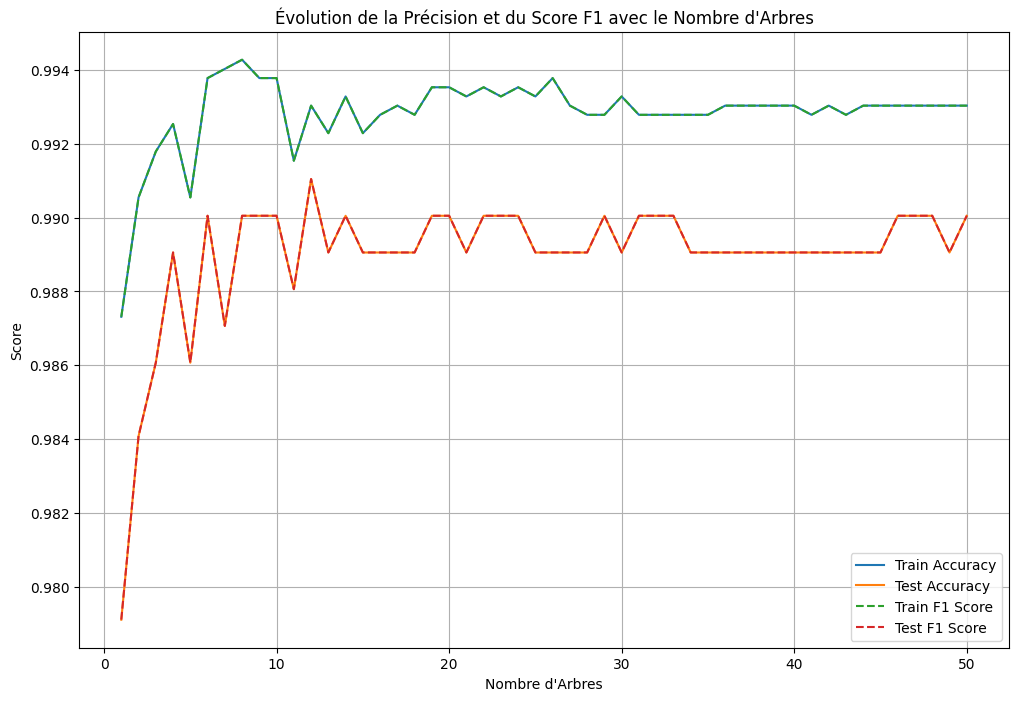

Résultats finaux:
Précision finale sur l'entraînement: 0.99
Précision finale sur le test: 0.99
Score F1 final sur l'entraînement: 0.99
Score F1 final sur le test: 0.99
Précision finale sur le test: 0.99
Rappel final sur le test: 0.99

Matrice de confusion pour l'ensemble de test:
[[490   0]
 [ 10 505]]


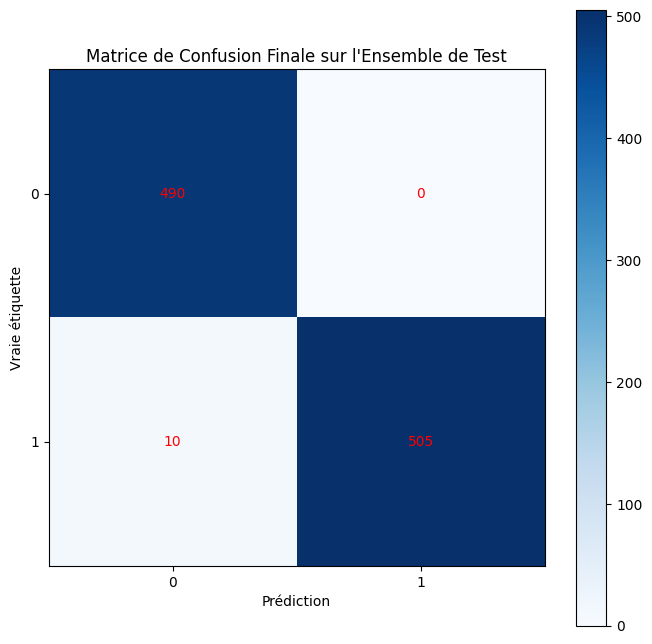

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump

# Chargement et préparation des données
dataTomClancy = pd.read_csv('./rs6_clean.csv')
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played', 'wins']
GoodDataTomClancy = dataTomClancy[colonnes]



n_estimators = 50
trees = []
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

for i in range(1, n_estimators + 1):
    bootstrap_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    
    tree = DecisionTreeClassifier(max_depth=5, random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    train_preds = np.array([tree.predict(X_train) for tree in trees])
    test_preds = np.array([tree.predict(X_test) for tree in trees])
    
    train_pred_majority = (np.sum(train_preds, axis=0) >= i / 2).astype(int)
    test_pred_majority = (np.sum(test_preds, axis=0) >= i / 2).astype(int)
    
    train_accuracy = accuracy_score(y_train, train_pred_majority)
    train_f1 = f1_score(y_train, train_pred_majority, average='weighted')
    test_accuracy = accuracy_score(y_test, test_pred_majority)
    test_f1 = f1_score(y_test, test_pred_majority, average='weighted')
    
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1)
    
    if i == n_estimators:
        final_train_predictions = train_pred_majority
        final_test_predictions = test_pred_majority

# Sauvegarde du modèle d'ensemble avec pickle
dump(model, 'random_forest_model.joblib')

print("Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.")

# Visualisation de l'évolution des métriques
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.plot(range(1, n_estimators + 1), train_f1_scores, label='Train F1 Score', linestyle='--')
plt.plot(range(1, n_estimators + 1), test_f1_scores, label='Test F1 Score', linestyle='--')
plt.xlabel("Nombre d'Arbres")
plt.ylabel("Score")
plt.title("Évolution de la Précision et du Score F1 avec le Nombre d'Arbres")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calcul des métriques finales
final_train_accuracy = accuracy_score(y_train, final_train_predictions)
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
final_train_f1 = f1_score(y_train, final_train_predictions, average='weighted')
final_test_f1 = f1_score(y_test, final_test_predictions, average='weighted')
final_precision = precision_score(y_test, final_test_predictions, average='weighted')
final_recall = recall_score(y_test, final_test_predictions, average='weighted')

print("Résultats finaux:")
print(f"Précision finale sur l'entraînement: {final_train_accuracy:.2f}")
print(f"Précision finale sur le test: {final_test_accuracy:.2f}")
print(f"Score F1 final sur l'entraînement: {final_train_f1:.2f}")
print(f"Score F1 final sur le test: {final_test_f1:.2f}")
print(f"Précision finale sur le test: {final_precision:.2f}")
print(f"Rappel final sur le test: {final_recall:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, final_test_predictions)
print("\nMatrice de confusion pour l'ensemble de test:")
print(conf_matrix)

plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion Finale sur l'Ensemble de Test")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
class_labels = np.unique(y_test)
plt.xticks(tick_marks, labels=class_labels)
plt.yticks(tick_marks, labels=class_labels)
plt.ylabel('Vraie étiquette')
plt.xlabel('Prédiction')
plt.grid(False)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{conf_matrix[i, j]}", ha="center", va="center", color="red")

plt.show()


In [121]:
X_final_test


,kills,deaths,losess,xp,headshots,games_played,time_played
3558,18367,22222,2925,54484238,6741,6046,1543
4486,9781,8923,973,26440696,3638,2151,606
4159,23287,19924,2282,54999528,10985,4714,1317
901,4754,4073,341,11426626,2151,835,271
3443,21880,18200,2010,50238897,7445,4222,1286
4566,26398,20443,2338,78770101,8128,4974,1631
2856,1860,1755,174,5575036,719,418,136
3445,45074,30078,3113,110012968,18395,7615,2295
3565,37677,25098,2610,89515903,14913,9140,2001
499,13349,12300,1181,32735683,5276,2550,830


In [124]:
X_final_test = test_final.drop(columns=['median_wins', 'wins'])
y_final_test = test_final['median_wins']

X_final_test = X_final_test[X_train.columns] 

final_predictions = []
for tree in trees:
    pred = tree.predict(X_final_test)
    final_predictions.append(pred)

final_predictions = np.array(final_predictions)

final_pred_majority = (np.sum(final_predictions, axis=0) >= n_estimators / 2).astype(int)

results = pd.DataFrame({
    'Actual': y_final_test.values,
    'Predicted': final_pred_majority
})
results['Result'] = np.where(results['Actual'] == results['Predicted'], '✅', '❌')
results.index = test_final.index 

display(results)



,Actual,Predicted,Result
435,1,1,✅
1126,0,0,✅
3945,0,0,✅
91,0,0,✅
3073,1,1,✅
5015,1,1,✅
2780,1,1,✅
664,0,0,✅
1447,1,1,✅
4114,0,0,✅
